**Energy Generation, Consumption, and Sustainability Trends: A Comparative Analysis of Developed and Developing Nations**

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb


In [ ]:
# Loading the dataset
file_path = 'owid-energy-data.csv'
energy_data = pd.read_csv(file_path)

print("Columns in the Dataset:\n", energy_data.columns)
print("\nFirst 5 rows of the Dataset:\n", energy_data.head())


Columns in the Dataset:
 Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'solar_share_elec', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy'],
      dtype='object', length=129)

First 5 rows of the Dataset:
          country  year iso_code  population  gdp  biofuel_cons_change_pct  \
0  ASEAN (Ember)  2000      NaN         NaN  NaN                      NaN   
1  ASEAN (Ember)  2001      NaN         NaN  NaN                      NaN   
2  ASEAN (Ember)  2002      NaN         NaN  NaN                      NaN   
3  ASEAN (Ember)  2003      NaN         NaN  NaN                      NaN   
4  ASEAN (Ember)  2004      NaN         NaN  NaN      

In [ ]:
# Step 2: Clean the Data with Interpolation


relevant_columns = [
    'country', 'year', 'population', 'primary_energy_consumption',
    'greenhouse_gas_emissions', 'renewables_share_energy',
    'coal_consumption', 'oil_consumption', 'gas_consumption', 'gdp'
]

filtered_data = energy_data[relevant_columns].copy()

numeric_cols = [
    'population', 'primary_energy_consumption', 'greenhouse_gas_emissions',
    'renewables_share_energy', 'coal_consumption', 'oil_consumption',
    'gas_consumption', 'gdp'
]

filtered_data[numeric_cols] = (
    filtered_data.groupby('country')[numeric_cols]
    .apply(lambda group: group.interpolate(method='linear', limit_direction='both'))
    .reset_index(drop=True)
)

filtered_data = filtered_data.dropna()

filtered_data = filtered_data[filtered_data['year'] >= 1980]

print("Cleaned and Interpolated Data Info:\n", filtered_data.info())
print("\nFirst 5 rows of Cleaned and Interpolated Data:\n", filtered_data.head())


<class 'pandas.core.frame.DataFrame'>
Index: 3283 entries, 716 to 21427
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     3283 non-null   object 
 1   year                        3283 non-null   int64  
 2   population                  3283 non-null   float64
 3   primary_energy_consumption  3283 non-null   float64
 4   greenhouse_gas_emissions    3283 non-null   float64
 5   renewables_share_energy     3283 non-null   float64
 6   coal_consumption            3283 non-null   float64
 7   oil_consumption             3283 non-null   float64
 8   gas_consumption             3283 non-null   float64
 9   gdp                         3283 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 282.1+ KB
Cleaned and Interpolated Data Info:
 None

First 5 rows of Cleaned and Interpolated Data:
      country  year  population  primary_energy_consumpti

In [ ]:
# Normalize data
scaler = MinMaxScaler()
normalized_data = filtered_data.copy()
numeric_cols = ['population', 'primary_energy_consumption', 'greenhouse_gas_emissions', 'renewables_share_energy']
normalized_data[numeric_cols] = scaler.fit_transform(normalized_data[numeric_cols])

developed_countries = ['United States', 'Germany', 'United Kingdom', 'Japan', 'Canada', 'Australia', 'France', 'South Korea']
developing_countries = ['India', 'China', 'Brazil', 'South Africa', 'Nigeria', 'Indonesia', 'Mexico', 'Vietnam']

def categorize_country(country):
    if country in developed_countries:
        return 'Developed'
    elif country in developing_countries:
        return 'Developing'
    return None

categorized_data = filtered_data.copy()
categorized_data['Category'] = categorized_data['country'].apply(categorize_country)
categorized_data = categorized_data[categorized_data['Category'].notnull()]  # Remove rows with None category

print("Normalized Data Sample:\n", normalized_data.head())
print("\nCategorized Data Sample:\n", categorized_data.head())


Normalized Data Sample:
      country  year  population  primary_energy_consumption  \
716  Algeria  1980    0.002301                    0.000934   
717  Algeria  1981    0.002377                    0.001155   
718  Algeria  1982    0.002458                    0.001347   
719  Algeria  1983    0.002542                    0.001479   
720  Algeria  1984    0.002631                    0.001417   

     greenhouse_gas_emissions  renewables_share_energy  coal_consumption  \
716                  0.001139                 0.005774             0.744   
717                  0.001139                 0.006770             0.523   
718                  0.001139                 0.007685             9.711   
719                  0.001139                 0.003445             8.664   
720                  0.001139                 0.006918             9.606   

     oil_consumption  gas_consumption           gdp  
716           66.202          109.436  9.448165e+10  
717           71.323          142.257

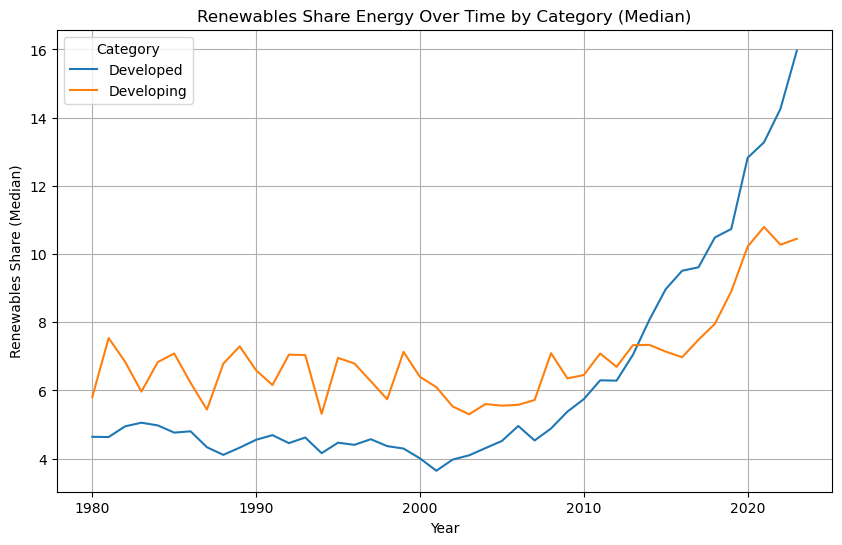

In [ ]:
category_trends = categorized_data.groupby(['year', 'Category']).agg({
    'renewables_share_energy': 'median',
    'greenhouse_gas_emissions': 'median',
    'primary_energy_consumption': 'median'
}).reset_index()

# Plot Renewables Share Energy
plt.figure(figsize=(10, 6))
sns.lineplot(data=category_trends, x='year', y='renewables_share_energy', hue='Category')
plt.title('Renewables Share Energy Over Time by Category (Median)')
plt.ylabel('Renewables Share (Median)')
plt.xlabel('Year')
plt.grid(True)
plt.show()



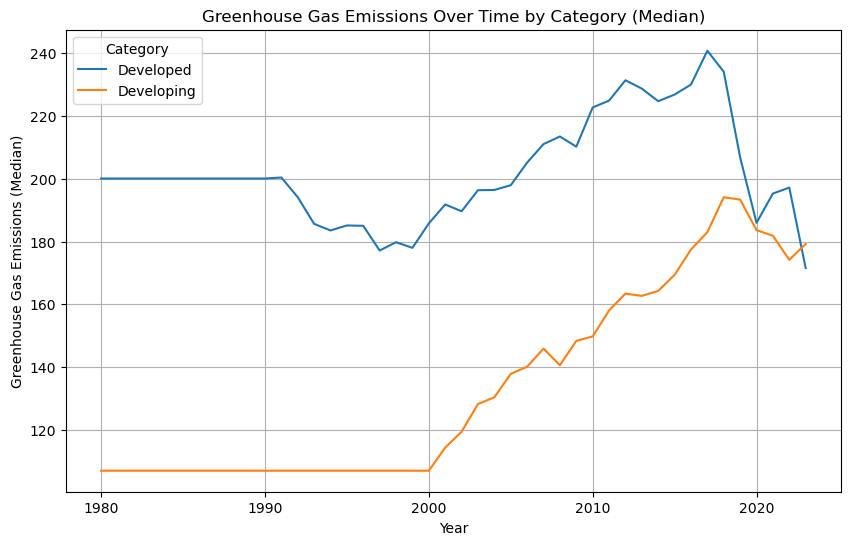

In [ ]:
# Plot Greenhouse Gas Emissions
plt.figure(figsize=(10, 6))
sns.lineplot(data=category_trends, x='year', y='greenhouse_gas_emissions', hue='Category')
plt.title('Greenhouse Gas Emissions Over Time by Category (Median)')
plt.ylabel('Greenhouse Gas Emissions (Median)')
plt.xlabel('Year')
plt.grid(True)
plt.show()


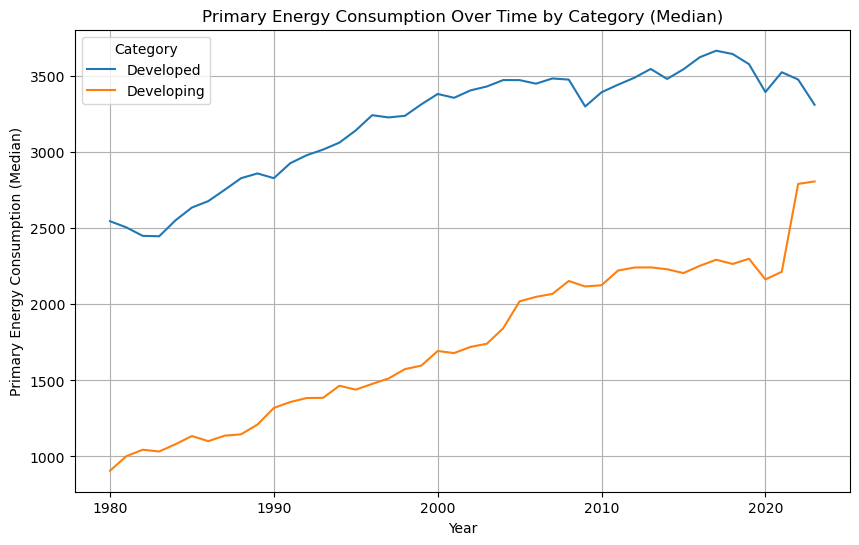

In [ ]:
# Plot Primary Energy Consumption
plt.figure(figsize=(10, 6))
sns.lineplot(data=category_trends, x='year', y='primary_energy_consumption', hue='Category')
plt.title('Primary Energy Consumption Over Time by Category (Median)')
plt.ylabel('Primary Energy Consumption (Median)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

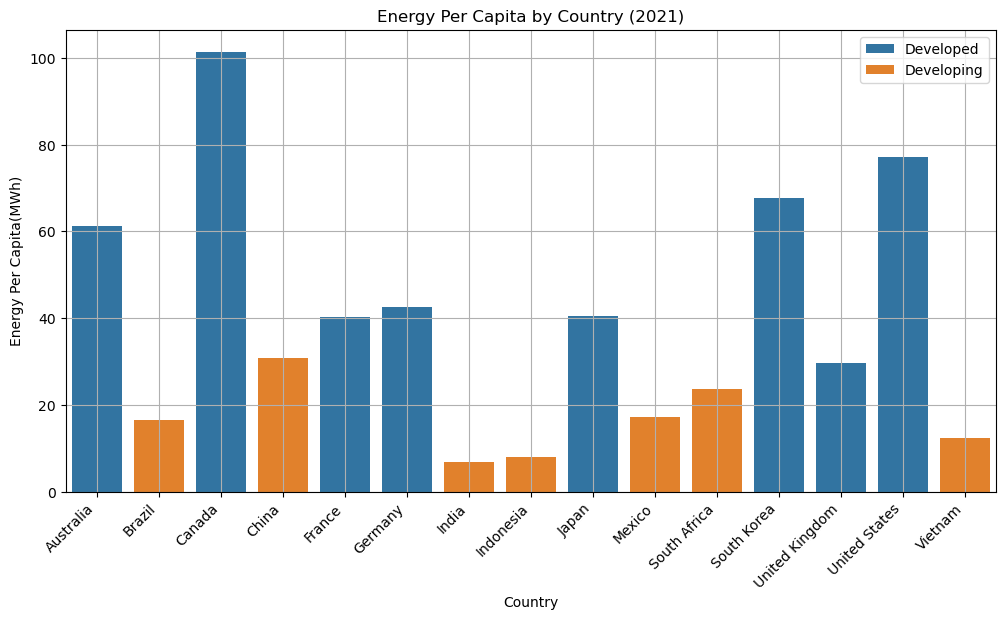

In [ ]:
# Energy per capita
categorized_data['Energy_per_Capita'] = categorized_data['primary_energy_consumption']*1000000 / categorized_data['population']

energy_per_capita_2021 = categorized_data[categorized_data['year'] == 2021]

# Visualize Energy per Capita
plt.figure(figsize=(12, 6))
sns.barplot(data=energy_per_capita_2021, x='country', y='Energy_per_Capita', hue='Category')
plt.title('Energy Per Capita by Country (2021)')
plt.ylabel('Energy Per Capita(MWh)')
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()


In [ ]:
region_mapping = {
    'United States': 'North America',
    'Canada': 'North America',
    'Brazil': 'South America',
    'Argentina': 'South America',
    'China': 'Asia',
    'India': 'Asia',
    'Japan': 'Asia',
    'Germany': 'Europe',
    'France': 'Europe',
    'United Kingdom': 'Europe',
    'South Africa': 'Africa',
    'Nigeria': 'Africa',
    'Kenya': 'Africa',
    'Australia': 'Oceania',
    'New Zealand': 'Oceania'
}

energy_data['Region'] = energy_data['country'].map(region_mapping)

regional_data = energy_data.dropna(subset=['Region'])

print(regional_data['Region'].unique())


['South America' 'Oceania' 'North America' 'Asia' 'Europe' 'Africa']


In [ ]:
energy_sources = ['solar_electricity', 'hydro_electricity', 'wind_electricity']

regional_aggregation = regional_data.groupby('Region')[energy_sources].sum().reset_index()

print(regional_aggregation)


          Region  solar_electricity  hydro_electricity  wind_electricity
0         Africa             61.580            315.747            74.710
1           Asia           3444.484          31828.704          5702.859
2         Europe            823.504           4918.683          2626.906
3  North America           1213.368          33803.527          4189.047
4        Oceania            210.644           2075.535           280.676
5  South America            131.190          15088.963           602.356


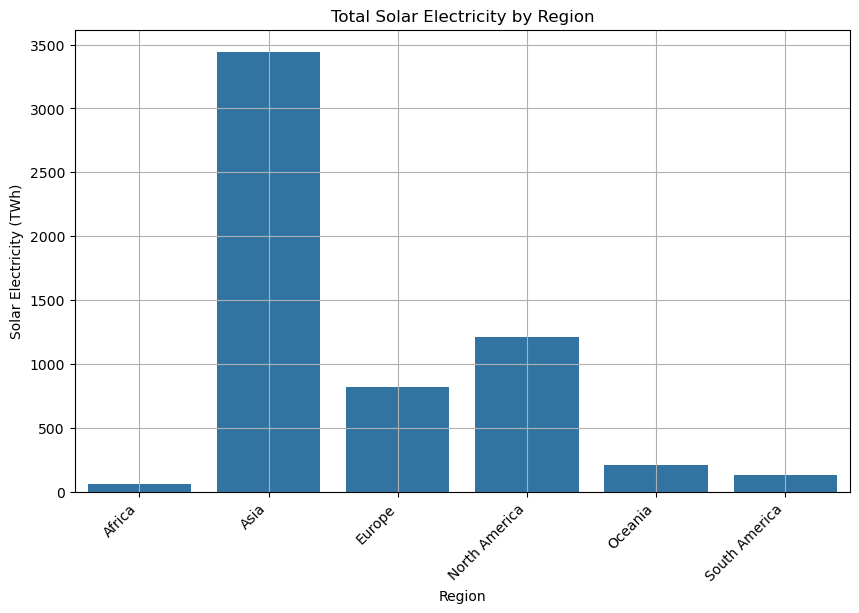

In [ ]:
# Solar Energy by Region
plt.figure(figsize=(10, 6))
sns.barplot(data=regional_aggregation, x='Region', y='solar_electricity')
plt.title('Total Solar Electricity by Region')
plt.ylabel('Solar Electricity (TWh)')
plt.xlabel('Region')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


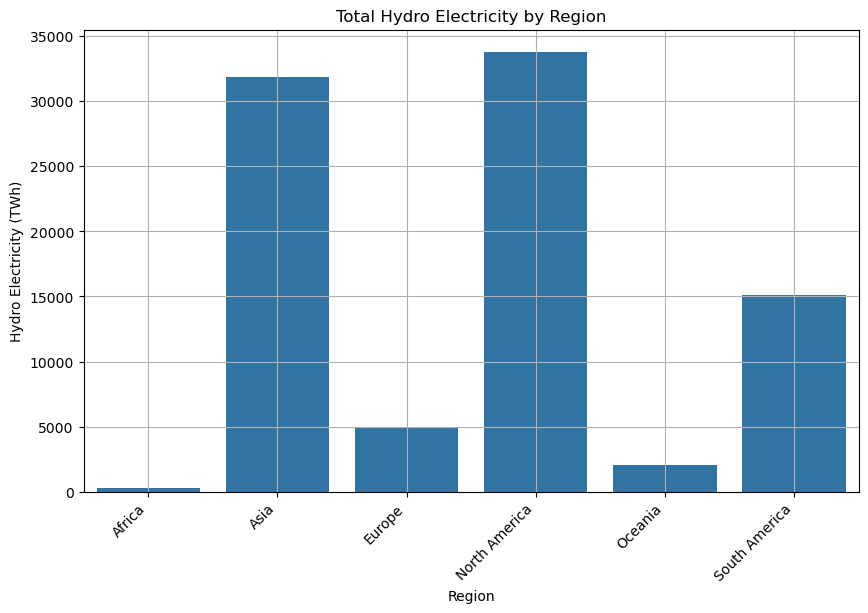

In [ ]:
# Hydro Energy by Region
plt.figure(figsize=(10, 6))
sns.barplot(data=regional_aggregation, x='Region', y='hydro_electricity')
plt.title('Total Hydro Electricity by Region')
plt.ylabel('Hydro Electricity (TWh)')
plt.xlabel('Region')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

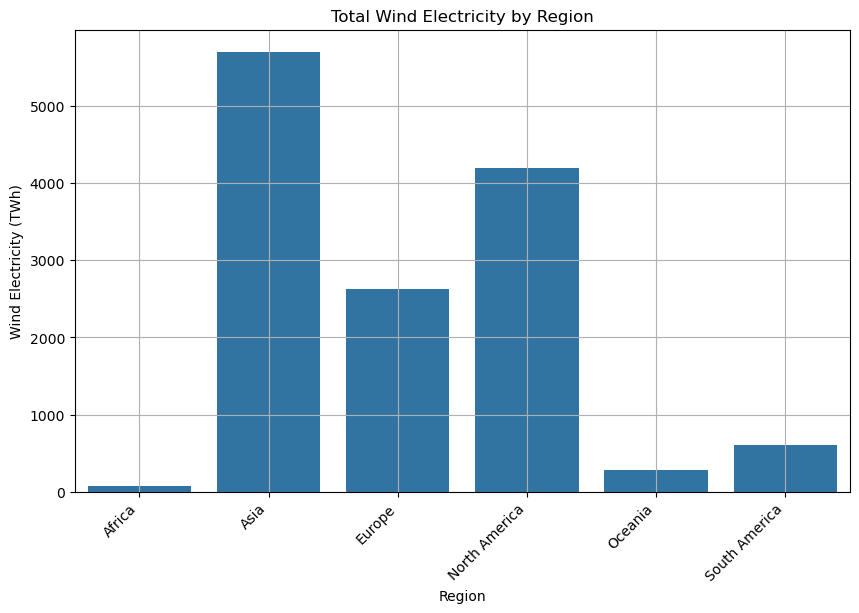

In [ ]:
# Wind Energy by Region
plt.figure(figsize=(10, 6))
sns.barplot(data=regional_aggregation, x='Region', y='wind_electricity')
plt.title('Total Wind Electricity by Region')
plt.ylabel('Wind Electricity (TWh)')
plt.xlabel('Region')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


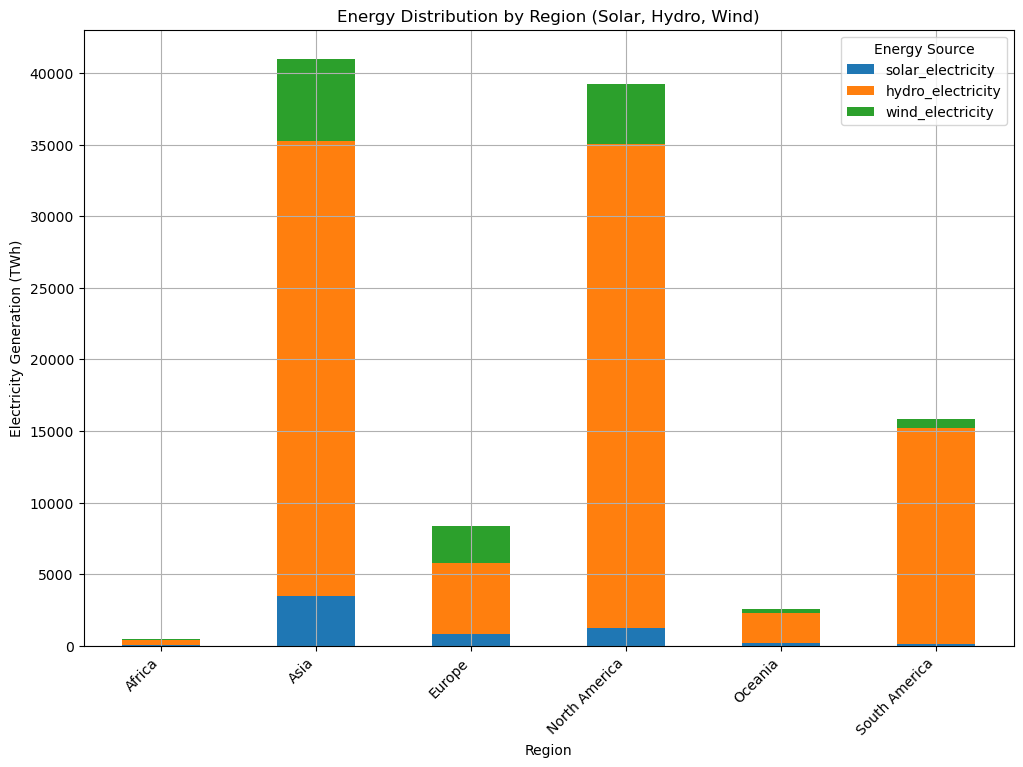

In [ ]:
# Stacked bar chart for all energy types by region
regional_aggregation.set_index('Region')[energy_sources].plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Energy Distribution by Region (Solar, Hydro, Wind)')
plt.ylabel('Electricity Generation (TWh)')
plt.xlabel('Region')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Energy Source')
plt.grid(True)
plt.show()
